# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | nabire
Processing Record 5 of Set 1 | nanjing
Processing Record 6 of Set 1 | taraz
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san felipe
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | goderich
Processing Record 13 of Set 1 | puerto leguizamo
Processing Record 14 of Set 1 | badiraguato
Processing Record 15 of Set 1 | dakoro
Processing Record 16 of Set 1 | maningrida
Processing Record 17 of Set 1 | kostomuksha
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | asau
Processing Record 22 of Se

Processing Record 39 of Set 4 | karaul
City not found. Skipping...
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | auki
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | bouillante
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | svetlogorsk
Processing Record 47 of Set 4 | cap malheureux
Processing Record 48 of Set 4 | atambua
Processing Record 49 of Set 4 | mathathane
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | acarau
Processing Record 3 of Set 5 | tuy hoa
Processing Record 4 of Set 5 | penha
Processing Record 5 of Set 5 | liwale
Processing Record 6 of Set 5 | alcaniz
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | nikolskoye
Processing Record 10 of Set 5 | mutsamudu
City not found. Skipping...
Processing 

Processing Record 29 of Set 8 | rosita
Processing Record 30 of Set 8 | vicuna
Processing Record 31 of Set 8 | napasar
Processing Record 32 of Set 8 | nizhniy tsasuchey
Processing Record 33 of Set 8 | masvingo
Processing Record 34 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 35 of Set 8 | torbay
Processing Record 36 of Set 8 | goundam
Processing Record 37 of Set 8 | andra
Processing Record 38 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 39 of Set 8 | calama
Processing Record 40 of Set 8 | oistins
Processing Record 41 of Set 8 | xuddur
Processing Record 42 of Set 8 | kamenka
Processing Record 43 of Set 8 | ahipara
Processing Record 44 of Set 8 | nyurba
Processing Record 45 of Set 8 | neos pirgos
City not found. Skipping...
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | gualaceo
Processing Record 48 of Set 8 | kincardine
Processing Record 49 of Set 8 | hay river
Processing Record 0 of Set 9 | tingi
Processing Recor

Processing Record 19 of Set 12 | xining
Processing Record 20 of Set 12 | chunoyar
Processing Record 21 of Set 12 | naldurg
Processing Record 22 of Set 12 | muros
Processing Record 23 of Set 12 | sao sebastiao
Processing Record 24 of Set 12 | kokstad
Processing Record 25 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 26 of Set 12 | shubarkuduk
Processing Record 27 of Set 12 | ust-maya
Processing Record 28 of Set 12 | niort
Processing Record 29 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 30 of Set 12 | mizdah
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | bako
Processing Record 33 of Set 12 | madimba
Processing Record 34 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 35 of Set 12 | hambantota
Processing Record 36 of Set 12 | vakhtan
Processing Record 37 of Set 12 | zhoucheng
Processing Record 38 of Set 12 | eirunepe
Processing Record 39 of Set 12 | shakhtinsk
Processing Record 40 of Set 12 | p

In [137]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame.from_records(city_data)
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [138]:
# Display sample data
city_data_df = city_data_df.rename(columns={"Lat":"Latitude","Lng":"Longitude"})
city_data_df.sample(50)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
264,peterhead,57.5058,-1.7981,6.36,62,58,7.22,GB,1679939351
75,kutum,14.2000,24.6667,24.39,20,88,3.80,SD,1679939209
257,sao joao da barra,-21.6403,-41.0511,32.05,73,30,6.30,BR,1679939346
68,bluff,-46.6000,168.3333,8.40,61,91,9.77,NZ,1679939206
189,tuy hoa,13.0833,109.3000,24.42,92,70,0.73,VN,1679939321
415,port-cartier,50.0334,-66.8654,0.42,98,100,3.09,CA,1679939455
7,san felipe,10.3399,-68.7425,30.49,46,77,3.46,VE,1679939184
338,boyolangu,-8.1181,111.8935,23.55,88,100,1.51,ID,1679939390
513,tuscaloosa,33.2098,-87.5692,25.12,58,0,2.06,US,1679939517
93,havoysund,70.9963,24.6622,-3.87,58,94,1.11,NO,1679939217


In [139]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [140]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,4.34,95,100,2.25,NZ,1679939181
1,punta arenas,-53.1500,-70.9167,4.06,87,100,6.17,CL,1679938970
2,nabire,-3.3667,135.4833,23.64,92,94,1.47,ID,1679939181
3,nanjing,32.0617,118.7778,6.95,67,33,1.68,CN,1679939182
4,taraz,42.9000,71.3667,7.23,70,33,4.00,KZ,1679939182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

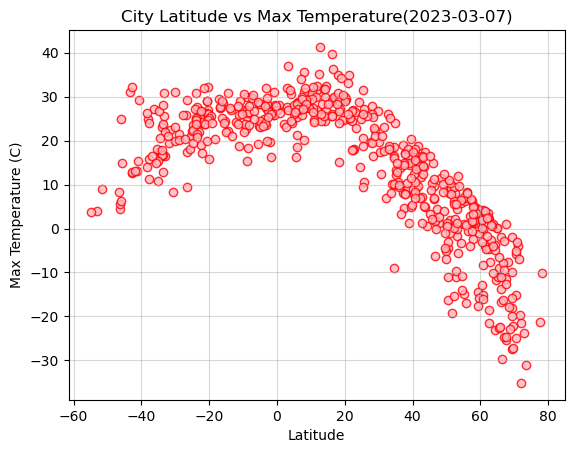

In [141]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Latitude"],city_data_df["Max Temp"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("output_data/Latitude vs Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

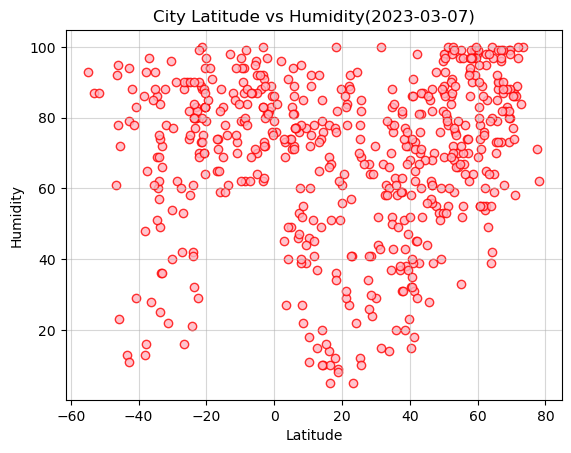

In [122]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"],city_data_df["Humidity"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

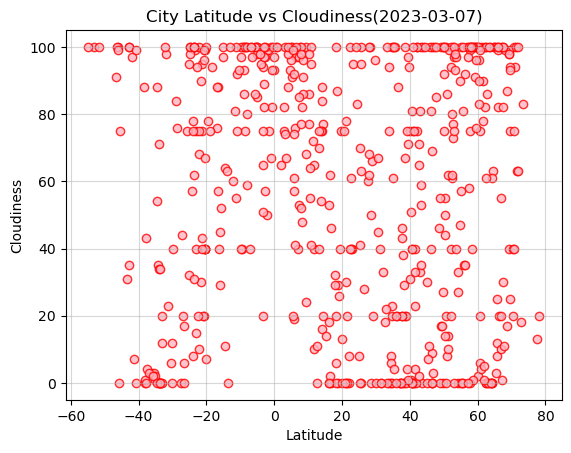

In [123]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Latitude"],city_data_df["Cloudiness"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

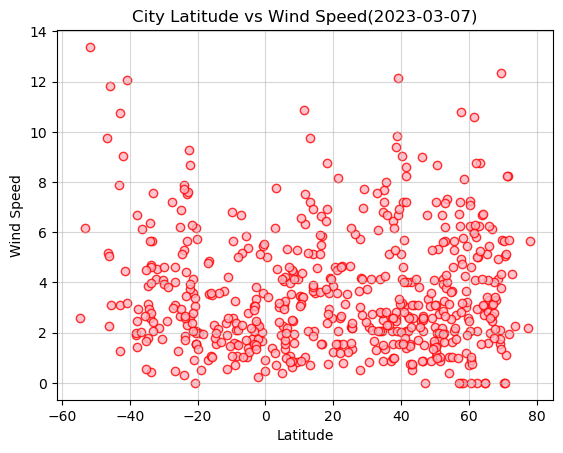

In [124]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Latitude"],city_data_df["Wind Speed"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderrr) = linregress(x,y)
    print(f"r-squared value is {round(st.pearsonr(x,y)[0],2)}")
    regress_values = round(slope,2) * x + round(intercept,2)
    equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
    plt.plot(x, regress_values, color='red')
    return equation
    

In [126]:
def annotation(equation, x_value,y_value):
     plt.annotate(equation,(x_value,y_value), color='black')

In [127]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >=0 ]
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,nanjing,32.0617,118.7778,6.95,67,33,1.68,CN,1679939182
4,taraz,42.9000,71.3667,7.23,70,33,4.00,KZ,1679939182
7,san felipe,10.3399,-68.7425,30.49,46,77,3.46,VE,1679939184
8,tuktoyaktuk,69.4541,-133.0374,-2.00,80,75,12.35,CA,1679939183
9,goderich,43.7501,-81.7165,4.95,87,100,3.09,CA,1679939158


In [128]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0 ]


# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,4.34,95,100,2.25,NZ,1679939181
1,punta arenas,-53.1500,-70.9167,4.06,87,100,6.17,CL,1679938970
2,nabire,-3.3667,135.4833,23.64,92,94,1.47,ID,1679939181
5,new norfolk,-42.7826,147.0587,12.72,79,100,1.28,AU,1679939183
6,ushuaia,-54.8000,-68.3000,3.79,93,100,2.57,AR,1679938919


###  Temperature vs. Latitude Linear Regression Plot

r-squared value is -0.89


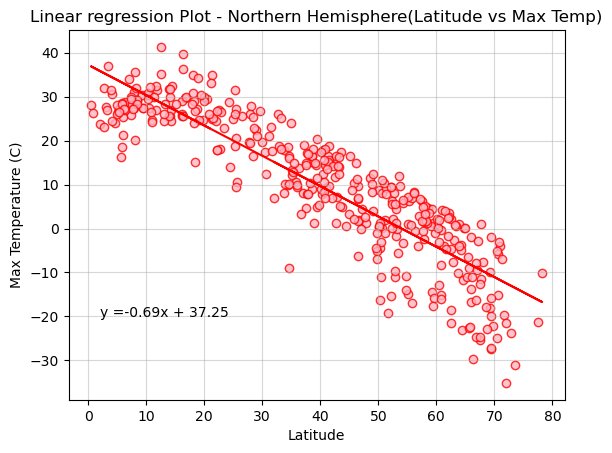

In [129]:
# Linear regression on Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp).png")


r-squared value is 0.57


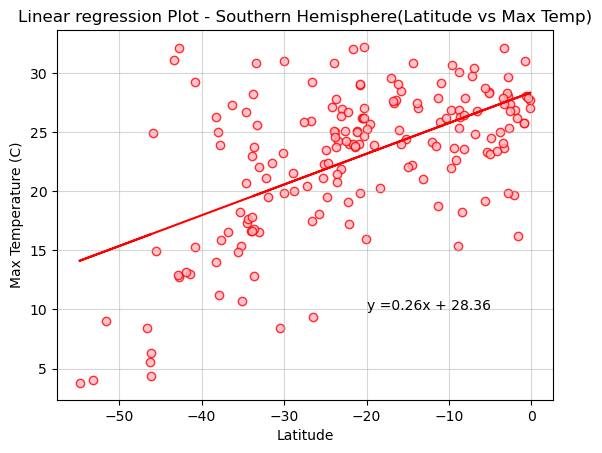

In [130]:
# Linear regression on Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp).png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-squared value is 0.37


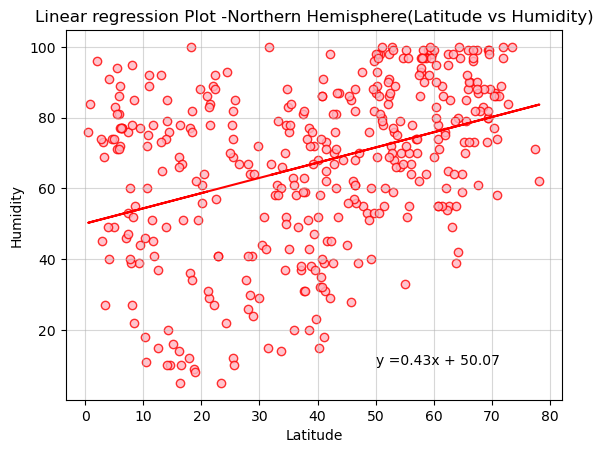

In [131]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"])
annotation(line_equation,50,10)
plt.title("Linear regression Plot -Northern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude Humidity).png")

r-squared value is 0.31


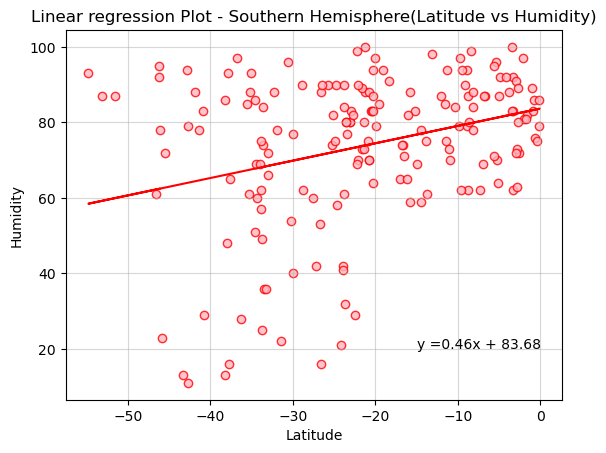

In [132]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"])
annotation(line_equation,-15,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Humidity).png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-squared value is -0.01


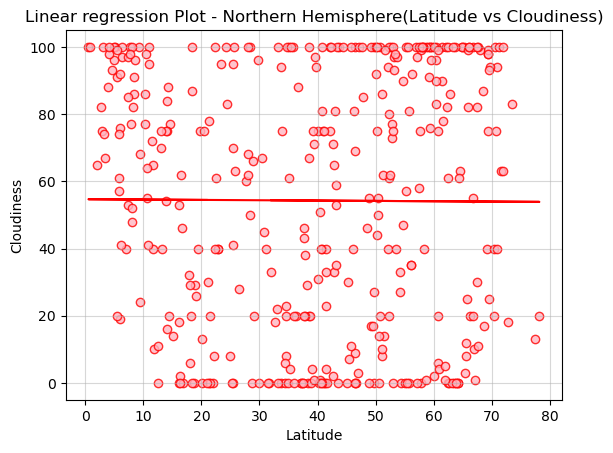

In [133]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness).png")

r-squared value is 0.38


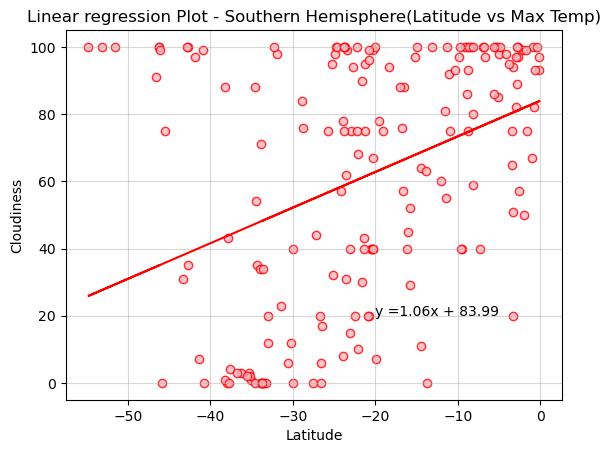

In [134]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness"])
annotation(line_equation,-20,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Cloudiness).png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-squared value is 0.04


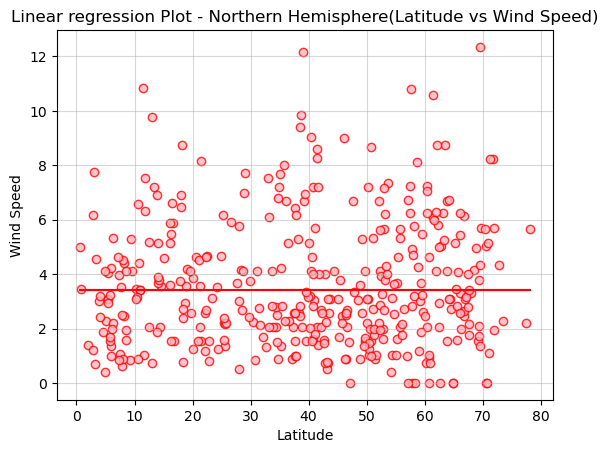

In [135]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed).png")

r-squared value is -0.37


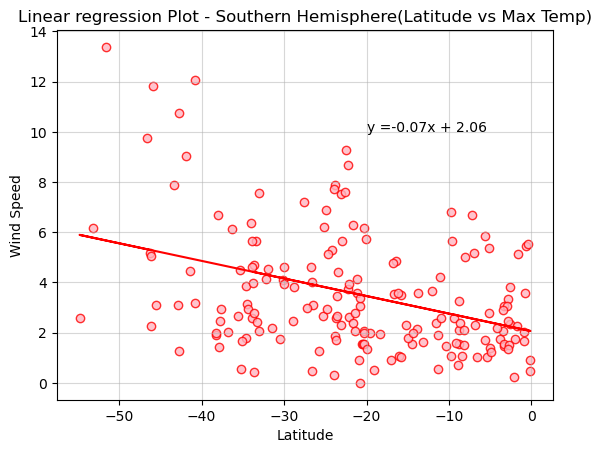

In [136]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Wind Speed).png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE